In [1]:
"""
    Práctica 2  - Laboratorio 01

    Asignatura:   Data mining

    Autores: 
            - Beatriz Magán Pinto
            - Andrés Felipe Sánchez Patarroyo
            - David Alonso Rodríguez Lepina
            - Raúl Jiménez Juárez

    Fecha:      30/09/2019
"""

'\n    Práctica 2  - Laboratorio 01\n\n    Asignatura:   Data mining\n\n    Autores: \n            - Beatriz Magán Pinto\n            - Andrés Felipe Sánchez Patarroyo\n            - David Alonso Rodríguez Lepina\n            - Raúl Jiménez Juárez\n\n    Fecha:      30/09/2019\n'

## Importamos las librerías necesarias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Obtención de datos
Importamos el csv y lo guardamos en un DataFrame, para almacenar correctamente los datos, establecemos que el delimitador de los elementos en el csv sea el carácter de punto y coma (;).

In [3]:
#Aquí comienza la parte 1 de la práctica 2. 
df_banco = pd.read_csv("DatasetsLab1/bancoufv.csv",delimiter=';')

## Limpieza y procesamiento de datos
lo primero que haremos, será eliminar las columnas que no son de utilidad para los problemas que analizaremos (según las indicaciones del laboratorio), conservando únicamente los campos de edad, nivel de educación, balance de la cuenta y duración.

In [4]:
#Eliminamos las columnas que no necesitamos, tal cual se pide en el pdf enunciado de la práctica
df_banco.drop(df_banco.columns.difference(['age','education','balance','duration']),1,inplace=True)

## Datos incompletos
Lo siguiente que haremos será estudiar todos los valores incompletos/vacíos y tratarlos. Para ello buscaremos todos los valores 'null' y/o 'NaN' y, si es posible, los sustituiremos o eliminaremos, según más convenga al sistema.

In [5]:
#Mostramos la información guardada en el dataframe. 
print(df_banco.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 4 columns):
age          45211 non-null int64
education    45211 non-null object
balance      45211 non-null int64
duration     45211 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.4+ MB
None


<b> Como se puede ver a través de la información de df_banco, no existe en el dataframe actual ningun valor nulo o vacio </b>

## Datos anómalos
Revisamos los valores máximos, mínimos y promedio a través de la función describe del dataframe

In [6]:
#revisamos los datos mediante df.describe()
print(df_banco.describe())

                age        balance      duration
count  45211.000000   45211.000000  45211.000000
mean      40.936210    1362.272058    258.163080
std       10.618762    3044.765829    257.527812
min       18.000000   -8019.000000      0.000000
25%       33.000000      72.000000    103.000000
50%       39.000000     448.000000    180.000000
75%       48.000000    1428.000000    319.000000
max       95.000000  102127.000000   4918.000000


<b>Como se puede ver, todos los valores minimos y maximos en las columnas con valores numericos tienen valores posibles (en duracion, el valor maximo en dias equivale a 13 años) <b>

## Datos anómalos
Revisamos la unicidad de los valores categóricos en la columna "education"

In [7]:
#Revisamos los Strings en la columna education
print(pd.unique(df_banco['education']))

['tertiary' 'secondary' 'unknown' 'primary']


<b>Cada uno de los valores representa una categoría distinta<b>

## Almacenamiento de información relevante
guardaremos el dataframe resultante de los procesos anteriores en un archivo con extensión csv, para poder trabajar con el más adelante.

In [8]:
#Guardamos el dataset en un csv, como se especifica en el pdf del enunciado de la práctica.
df_banco.to_csv('DatasetsLab1/banco_util.csv',index=False)

In [9]:
#Leemos el csv que hemos creado nuevo. 
df_util = pd.read_csv("DatasetsLab1/banco_util.csv")

## Transformación de datos
definiremos los rangos relacionados al balance de la cuenta, todos aquellos menores a 0, entre 0 y 10.000 y aquellos con valores superiores a 10.000, para ello añadiremos una columna con tres valores, cada uno correspondiente a los rangos que vimos anteriormente

In [10]:
#Definimos los rangos definidos en el enunciado de la práctica. 
df_util['rangos'] = 1
df_util.loc[df_util['balance'] <0, 'rangos'] = 1
df_util.loc[(df_util['balance']>0) & (df_util['balance']<10000), 'rangos'] = 2
df_util.loc[df_util['balance'] >=10000, 'rangos'] = 3

## Análisis de valores promedio 
realizaremos una comparación del promedio de saldo en la cuenta por nivel educativo

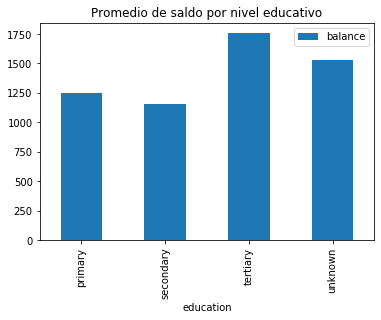

In [11]:
#Agrupamos según el promedio de saldo por nivel educativo
mean_balance=df_util.groupby('education').mean()[['balance']]
mean_balance.plot.bar(title='Promedio de saldo por nivel educativo')

Como se puede observar, el nivel educativo superior (terciario) es el que posee un promedio más alto en los valores de balance de cuenta, sin embargo, la diferencia entre los promedios no es significativa

## Agrupación de datos
crearemos cuatro dataframes nuevos, cada uno de ellos agrupando las filas por nivel educativo (primaria, secundaria, terciaria y desconocida)

In [12]:
#creamos cuatro dataframes, cada uno con los valores de las categorias de educación
ed_primaria=df_util.loc[df_util.groupby(['education']).groups['primary']]
ed_secundaria=df_util.loc[df_util.groupby(['education']).groups['secondary']]
ed_terciaria=df_util.loc[df_util.groupby(['education']).groups['tertiary']]
ed_desconocida=df_util.loc[df_util.groupby(['education']).groups['unknown']]
#contamos la cantidad de cuentas en cada rango de educación que pertenecen a los rangos de saldos
primaria_val = ed_primaria.groupby('rangos').count()['age'].tolist()
secundaria_val = ed_secundaria.groupby('rangos').count()['age'].tolist()
terciaria_val=ed_terciaria.groupby('rangos').count()['age'].tolist()
desconocida_val=ed_desconocida.groupby('rangos').count()['age'].tolist()


# Análisis de saldos en cuenta
Optamos por realizar el análisis implementando dos tipos de visualizaciones, la primera de ellas, por gráficos de barras agrupadas, esto para realizar una comparación entre los rangos de saldo y los niveles educativos, el segundo mediante gráficos circulares, para analizar los porcentajes que poseen los tipos de cliente en cada uno de los rangos

## Análisis mediante gráfico de barras agrupado 
Realizaremos un gráfico de barras por cada uno de los rangos de saldo en las cuentas, distinguiendo cada uno de los niveles educativos. Para la simplicidad en la lectura esta grafica, tanto en las posteriores, representaremos estos tres rangos de la siguiente forma:
<ul>
    <li><b>Saldo negativo: </b>cuentas con saldos negativos (menores a 0) </li>
    <li><b>Poco saldo: </b>cuentas con saldos positivos menores a &euro;10.000  </li>
    <li><b>Saldo considerable: </b>cuentas con saldos positivos superiores a &euro;10.000 </li>
</ul>


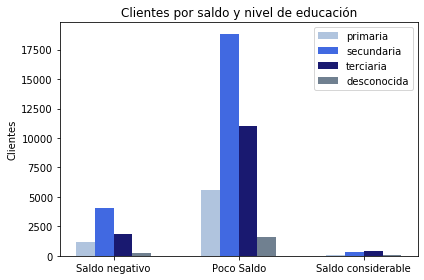

In [13]:
#Codigo para generar graficas de barras
labels = ['Saldo negativo', 'Poco Saldo', 'Saldo considerable']
colors = ['lightsteelblue', 'royalblue', 'midnightblue', 'slategrey']
x = np.arange(len(labels))
width = 0.15
fig, ax = plt.subplots()
rects1 = ax.bar(x - 3*width/2, primaria_val, width, label='primaria',color=colors[0])
rects2 = ax.bar(x - width/2, secundaria_val, width, label='secundaria',color=colors[1])
rects3 = ax.bar(x + width/2, terciaria_val, width, label='terciaria',color=colors[2])
rects4 = ax.bar(x + 3*width/2, desconocida_val, width, label='desconocida',color=colors[3])
ax.set_ylabel('Clientes')
ax.set_title('Clientes por saldo y nivel de educación')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()
plt.show()

Lo primero que se puede observar a simple vista es que la cantidad de clientes con educación secundaria es bastante alta comparada a los otros niveles educativos (principalmente frente a aquellos con educación primaria, o nivel desconocido), esto puede ser debido a que la mayoría de estudiantes en la UFV están realizando sus primeras titulaciones de pregrado, así como las cuentas de clientes con educación terciaria pueden ser tanto estudiantes de posgrados, como profesores y directivos de la universidad entre otros.
Respecto a la distribucion, las cuentas con saldo negativo son generalmente de clientes con nivel de educación secundaria, seguidos por clientes con educación terciaria, educación primaria y nivel desconocido, esta distribución es idéntica para las cuentas con poco saldo, cabe considerar que en este rango es donde se encuentra la mayoría de clientes, por último, en las cuentas con saldos considerables, los clientes con educación terciaria representan mayoría, esto puede deberse a muchos factores, entre ellos el nivel de ingresos promedio de un cliente con educación terciaria (que debido a sus titulos, generalmente tienen sueldos mas altos),.


## Análisis mediante gráfico circular 
realizaremos pie charts (o gráficos circulares) para representar de una mejor forma los porcentajes que representan los niveles educativos en cada uno de los rangos de saldo

### Clientes con saldo negativos

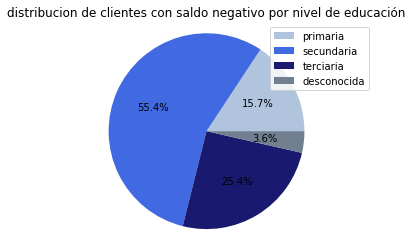

In [14]:
# pie chart saldos negativos
pie_labels=['primaria','secundaria','terciaria','desconocida']
sizes1 = [primaria_val[0], secundaria_val[0], terciaria_val[0], desconocida_val[0]]
# Plot
plt.pie(sizes1, colors=colors,autopct='%1.1f%%')
plt.title('distribucion de clientes con saldo negativo por nivel de educación')
plt.legend(pie_labels)
plt.axis('equal')
plt.show()

en este primer gráfico, sobre los saldos negativos, podemos observar que más de la mitad de clientes tienen una educación secundaria, esto puede deberse a lo que anteriormente resaltamos en la gráfica de barras (clientes con educación secundaria son mayoría), complementando esto a la posible falta de experiencia con el sector financiero y los creditos en general, lo cual lleva a que realicen mas compras de las necesarias, el segundo tipo de cliente predominante es el que posee estudios terciarios, esto posiblemente se deba a creditos (los cuales pueden solventar gracias a hipoteticos ingresos elevados) para proyectos como compras de bienes inmuebles, vehiculos entre otros, aunque claramente no se descarta que algunos tengan estos saldos por los mismos posibles motivos que clientes con estudios secundarios.

### Clientes con poco saldo 

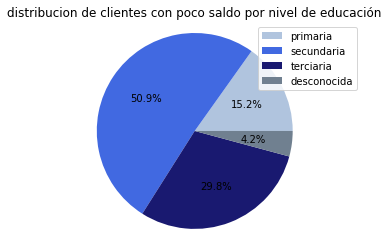

In [15]:
# pie chart poco saldo
sizes2 = [primaria_val[1], secundaria_val[1], terciaria_val[1], desconocida_val[1]]
# Plot
plt.pie(sizes2, colors=colors,autopct='%1.1f%%')
plt.title('distribucion de clientes con poco saldo por nivel de educación')
plt.legend(pie_labels)
plt.axis('equal')
plt.show()

En este grafico encontramos una ligera variación en los porcentajes de cada uno de los tipos de cliente, principalmente notamos una disminución en la cantidad de clientes con educación secundaria (cercano a un 5%) y un aumento en un porcentaje similar de los clientes de educación terciaria, para los casos de clientes con educación primaria y desconocida, aumentan un poco, sin llegar a ser relevante, consideramos que por ser el rango medio, la mayoría de clientes, independiente de su nivel educativo, se encuentren aquí.

### Clientes con saldo considerable

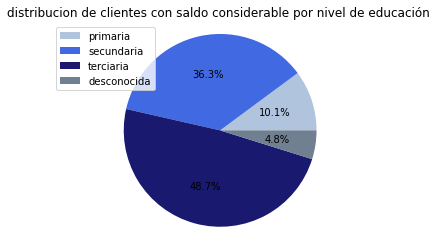

In [16]:
# pie chart saldos considerables
sizes3 = [primaria_val[2], secundaria_val[2], terciaria_val[2], desconocida_val[2]]
# Plot
plt.pie(sizes3, colors=colors,autopct='%1.1f%%')
plt.title('distribucion de clientes con saldo considerable por nivel de educación')
plt.legend(pie_labels)
plt.axis('equal')
plt.show()

En este último pie chart, podemos observar un gran cambio en los porcentajes de clientes con educación secundaria y terciaria, esta última ahora con un 48.7% del total de clientes con saldos considerables, mientras que los clientes con educación secundaria ahora representan el 36.3%, cuando en los dos rangos anteriores representaban la mayoría con más del 50%, esto puede deberse a que los clientes con educación terciaria, al tener mejores salarios y probablemente un estilo de vida austero, prefieren ahorrar sus excedentes de dinero.

## Conclusiones
podemos afirmar que para los casos de clientes con educación secundaria y terciaria, existe una relación frente al saldo de sus cuentas, que generalmente para cuentas con saldos elevados, los clientes tienen un nivel de educación terciaria, mientras que las cuentas con saldos "normales" y saldos negativos generalmente pertenecen a clientes con nivel educativo secundario, para clientes con educación primaria o desconocida, los porcentajes son constantes en los tres rangos, sin embargo cabe resaltar que las cuentas con saldos considerables representan un porcentaje muy pequeño, como se observa en la gráfica a continuación:


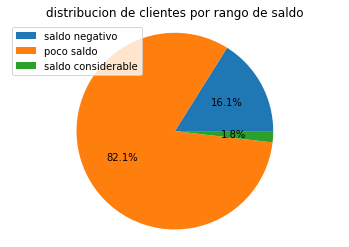

In [17]:
# pie chart saldos
sizes_saldo = df_util.groupby(['rangos']).count()["education"].tolist()
# Plot
plt.pie(sizes_saldo,autopct='%1.1f%%')
plt.title('distribucion de clientes por rango de saldo')
plt.legend(['saldo negativo','poco saldo','saldo considerable'])
plt.axis('equal')
plt.show()

# Distribución de clientes por rangos de edad 
Realizaremos un gráfico circular para comparar la cantidad de clientes en cada uno de los rangos de edad, basándonos en las recomendaciones hechas en el laboratorio, representaremos estos rangos de la siguiente forma:
<ul>
    <li><b>Alumno: </b>Clientes menores de 30 años </li>
    <li><b>Trabajador joven: </b>Clientes de entre 30 a 45 años </li>
    <li><b>Trabajador veterano: </b>Clientes de entre 46 a 65 años </li>
    <li><b>No vinculado: </b>Clientes mayores a 65 años </li>
</ul>


In [18]:
#Aquí comienza la parte 2 de la práctica 2. 
#creamos una nueva columna y la completamos revisando los rangos de edades
df_util['cliente_tipo'] = 'No vinculado'
df_util.loc[df_util['age'] <30, 'cliente_tipo'] = 'Alumno'
df_util.loc[(df_util['age']>=30) & (df_util['age']<=45), 'cliente_tipo'] = 'Trabajador joven'
df_util.loc[(df_util['age']>45) & (df_util['age']<=65), 'cliente_tipo'] = 'Trabajador veterano'

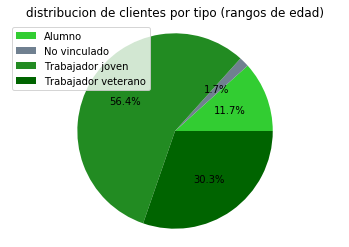

In [19]:
# Pie chart tipos de cliente
pie_labels=df_util.groupby('cliente_tipo').groups.keys()
sizes = df_util.groupby('cliente_tipo').count()['age'].tolist()
colors2 = ['limegreen', 'slategrey', 'forestgreen', 'darkgreen']
# Plot
plt.pie(sizes, colors=colors2,autopct='%1.1f%%')
plt.title('distribucion de clientes por tipo (rangos de edad)')
plt.legend(pie_labels)
plt.axis('equal')
plt.show()

## Conclusiones
A partir de la transformación realizada, podemos concluir que son pocos los estudiantes que utilizan los servicios ofrecidos por la empresa (11.7% del total de clientes) en la Universidad, ya que la mayoría de las cuentas pertenecen a trabajadores jóvenes (56.4%) y veteranos (30.3%), sin embargo, existe la posibilidad de que algunos estudiantes sean mayores a 30 años (probablemente estudiantes de postgrados), por lo que podría verse afectada la distribución de las cuentas.

# Tiempo de los clientes en la empresa
representaremos la distribución de la duración de los clientes a través de un polígono de frecuencia, cuyas barras representarán aproximadamente un semestre cada una, se realizara la transformación pertinente para que el eje x este en años, por lo cual los valores serán divididos entre 365.

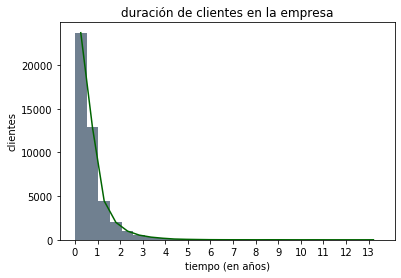

In [20]:
#Aquí comienza la parte 3 de la práctica 2.
max_years=round((df_util['duration'].max())/365)
n,x,_ = plt.hist((df_util['duration']/365).tolist(),color='slategrey',bins=int(max_years)*2 )
bin_centers = 0.5*(x[1:]+x[:-1])
plt.plot(bin_centers,n,color='darkgreen') 
plt.xticks(np.arange(0, max_years+1, step=1))
plt.xlabel("tiempo (en años)")
plt.ylabel("clientes")
plt.title("duración de clientes en la empresa")
plt.show()

## Conclusiones
Gracias a la gráfica, podemos evidenciar que, a través del tiempo, los clientes decaen de forma exponencial, destacando que la mayoría de clientes de la empresa han estado vinculados menos de un año, teniendo en cuenta el apartado anterior (rangos de edades), deducimos que esta variación está relacionada fuertemente con los trabajadores, por lo que podríamos atribuir este comportamiento a una posible alta rotación de personal en la universidad.
